In [1]:
# imports

from flask import Flask, request

import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import random
import os

In [60]:
CURRENT_DIRECTORY = os.getcwd() # get current directory

dataset = pd.read_csv(CURRENT_DIRECTORY + '/ufcdata/preprocessed_data.csv') # open the file

dataset['Id'] = range(dataset.shape[0])

feature_columns = ['B_avg_BODY_landed','R_avg_BODY_landed']
X = dataset[feature_columns].values
Y = dataset['Winner'].values

le = LabelEncoder()
Y = le.fit_transform(Y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009FC9508FC8>,
      dtype=object)

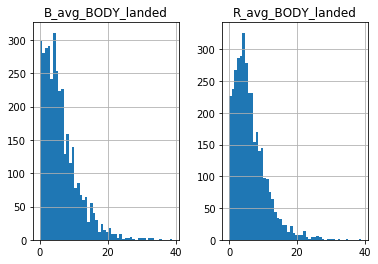

In [61]:
# visualize hisogram of body and head landed

dataset.hist(column=['B_avg_BODY_landed','R_avg_BODY_landed'], bins = 50)

In [62]:
# Splitting into training and test datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=50)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [63]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')
cm = confusion_matrix(Y_test, Y_pred)
cm

[1 1 1 ... 1 1 1]
Accuracy of model: 64.25 %.


array([[  38,  592],
       [  50, 1116]], dtype=int64)

<Figure size 432x288 with 0 Axes>

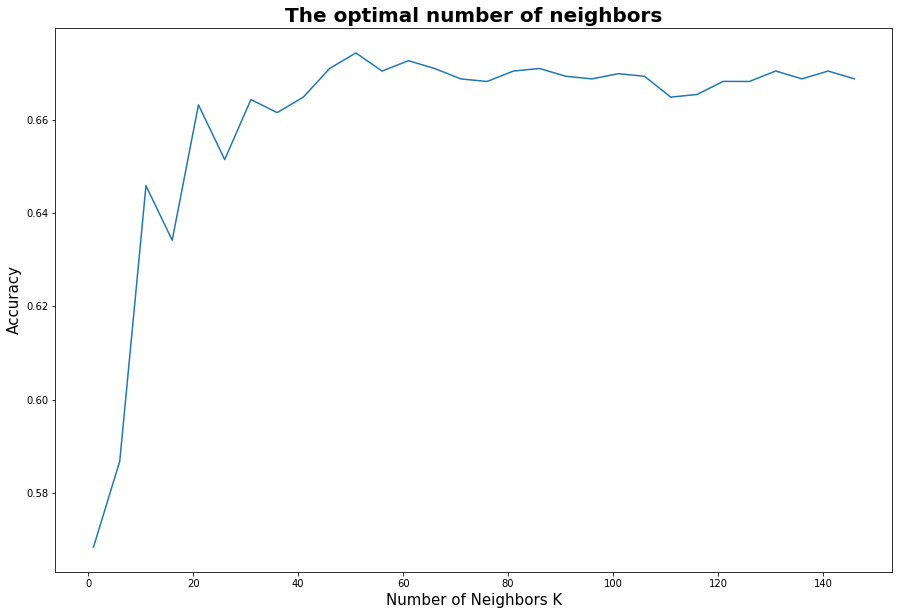

In [64]:
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1, 150, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(range(1, 150, 5), cv_scores)

plt.show()

In [ ]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to flower names
    classes = [ "Blue Wins", "Red Wins"]
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ["b_body", "r_body"]]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?b_body=NUM&r_body=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return f"{classes[prediction]}: {knn_classifier.predict_proba(values)[0][prediction]}%"

# Run the app.
app.run()

# try 127.0.0.1:5000?b_body=10&r_body=15

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
